In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)#test and train division
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking
%matplotlib inline
from pylab import *
from matplotlib.pyplot import *
df = pd.read_csv('modemp.csv')
X=df[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender']]
y=df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\LOKSUNDAR\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Text(0.5, 1.0, 'DEPTH vs ACCURACY')

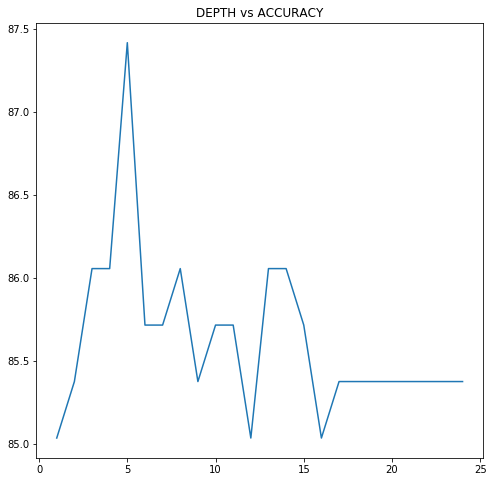

In [2]:
gx = []
gy = []
for i in range(1,25):
    gx.append(i)
    xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=i)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("DEPTH vs ACCURACY")

In [3]:
7

7

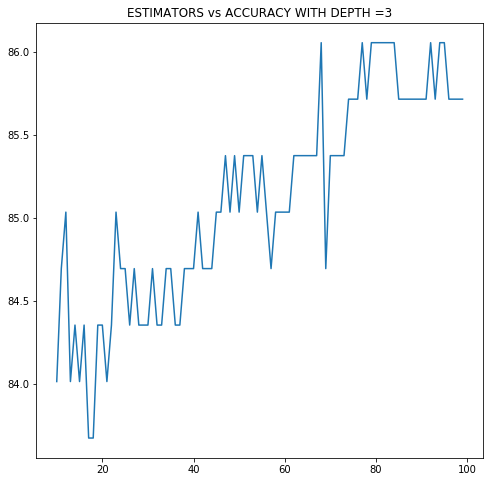

In [8]:
gx = []
gy = []
for i in range(10,100):
    gx.append(i)
    xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=i, max_depth=15)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("ESTIMATORS vs ACCURACY WITH DEPTH =3")
ax = plt
plt.show()

In [9]:
ax.show()

C:\Users\LOKSUNDAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


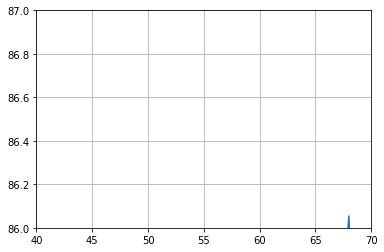

In [5]:
plt.plot(gx,gy)
axes=plt.axes()
axes.set_ylim([86,87])
axes.set_xlim([40,70])
axes.grid()

In [6]:
50
import time
t1 = time.perf_counter()

xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=50, max_depth=15)
xb.fit(X_train,y_train)
t2=time.perf_counter()
print("elapsed time is :",(t2-t1)*100000)

elapsed time is : 8081.98999999945


In [7]:
from sklearn.metrics import classification_report
print(classification_report( xb.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       271
           1       0.29      0.61      0.39        23

    accuracy                           0.85       294
   macro avg       0.62      0.74      0.65       294
weighted avg       0.91      0.85      0.87       294



In [8]:
def v(a,b):
    r = 2*a*b
    r = r/(a+b)
    print (r)
v(91,39)

54.6


In [9]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix( xb.predict(X_test),y_test).ravel()
(tn, fp, fn, tp)
p = tp/(tp+fp)
r = tp/(tp+fn)
f = 2*p*r/(p+r)
f

0.3888888888888889

In [10]:
from xgboost import plot_tree

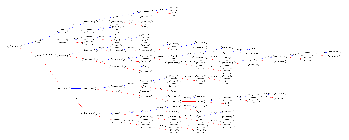

In [17]:
xgb= plot_tree(xb, num_trees=0,rankdir = 'LR')

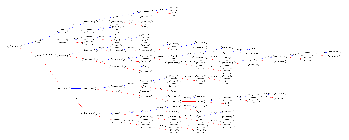

In [12]:
xgb.figure.savefig('xb.pdf')

In [70]:
from xgboost import plot_importance as pl

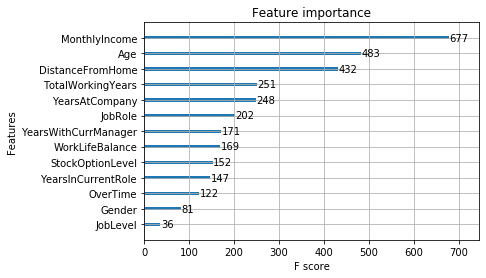

In [71]:
ax=plot_importance(xb)
ax.figure.savefig('XGB_Feature.png')